# OS project: Round Robin

In [6]:
import operator
import time
from collections import deque
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.close("all")

## inputs:

In [26]:
processes = []
# name, enter_time, burst_time

number_of_processes = input("enter the number of processes")
for i in range(eval(number_of_processes)):
    name = input("name of processes: ")
    entry_time = eval(input("entry time: (enter based on nano sec)"))
    burst_time = eval(input("burst time: (enter based on nano sec)"))
    processes.append([name, entry_time, burst_time])

print("number of processes: {}".format(number_of_processes))
process_table=pd.DataFrame(processes)
process_table=process_table.rename(columns={0:'name',1:'entry_time',2:'burst_time'})
display(process_table)



SyntaxError: unexpected EOF while parsing (<string>, line 0)

## Data Structures:

In [14]:
process_table.to_csv(r'./input.csv')

## Load

In [7]:
process_table=pd.read_csv('./input.csv')
number_of_processes = eval(input("enter the number of processes"))
quantum=eval(input("enter quantum: (enter based on nano sec)"))
print(
    process_table
)
print('quantum: ',quantum)

  name  entry_time  burst_time
0   p1           0          10
1   p2           3           6
2   p3           3           4
3   p4           8           3
4   p5          13           5
quantum:  4


## Pre processing:


In [8]:
processes = []
process_table.sort_values(by='entry_time',inplace=True)
display(process_table)

,name,entry_time,burst_time
0,p1,0,10
1,p2,3,6
2,p3,3,4
3,p4,8,3
4,p5,13,5


## Main code:

In [46]:


global waiting_queue
waiting_queue= deque()
global gantt_chart
gantt_chart = []
global processes
processes = process_table.values.tolist()
global elapsed_time

elapsed_time = 0
global processes_backup
processes_backup=deepcopy(processes)


def round_robin():
    global gantt_chart
    global elapsed_time
    time_table=[]
    exit_table=[]


    while True:


        check_time()
        if len(waiting_queue) == 0:
            break
        ready_proc = waiting_queue.popleft()

        gantt_chart.append(ready_proc)

        time_table.append(elapsed_time)

        if ready_proc[2] > 0:
            if ready_proc[2] > quantum:
                tick(quantum)
                ready_proc[2] -= quantum
                waiting_queue.append(ready_proc)
            else:
                tick(ready_proc[2])
                ready_proc[2] = 0
            exit_table.append(elapsed_time)

    gantt_chart=pd.DataFrame(gantt_chart)
    gantt_chart=gantt_chart.rename(columns={0:'order of processes',1:'entry_time',2:'burst_time',3:'enter time',4:'exit time',5:'duration'})
    gantt_chart.drop(columns=['entry_time','burst_time'],inplace=True)
    gantt_chart["enter time"]=time_table
    gantt_chart['exit time']=exit_table
    gantt_chart['duration']=list(map(operator.sub,exit_table,time_table))
    display(gantt_chart)
    print("elapsed time :{} ".format(elapsed_time))

    print("Waiting Time :{} ".format(waiting_time_calc()))


def check_time():
    global elapsed_time
    for row in range(len(processes)):
            if elapsed_time >= processes[row][1]:
                if processes[row][1] >= 0:
                    waiting_queue.append(processes[row])
                    processes[row][1] = -1



def tick(sec):
    global elapsed_time
    for t in range(sec):
        elapsed_time += 1
        check_time()

round_robin()


,order of processes,enter time,exit time,duration
0,p1,0,4,4
1,p2,4,8,4
2,p3,8,12,4
3,p1,12,16,4
4,p4,16,19,3
5,p2,19,21,2
6,p5,21,25,4
7,p1,25,27,2
8,p5,27,28,1


elapsed time :28 
Waiting Time :10.4 


In [44]:
def waiting_time_calc():

    global processes_backup
    g_table = gantt_chart.values.tolist()
    g_table.sort(reverse = True, key = lambda x: x[2])
    last_list = []
    up_side = 0.0

    for proc in processes_backup:
        for item in g_table:
            if item[0] == proc[0]:
                last_list.append(item[2])
                break

    for proc in range(len(processes_backup)):
        up_side += (last_list[proc] - processes_backup[proc][2] - processes_backup[proc][1])

    waiting_time = up_side / number_of_processes

    return waiting_time


<AxesSubplot:>

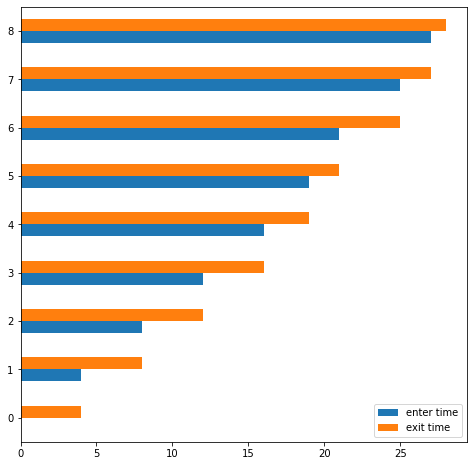

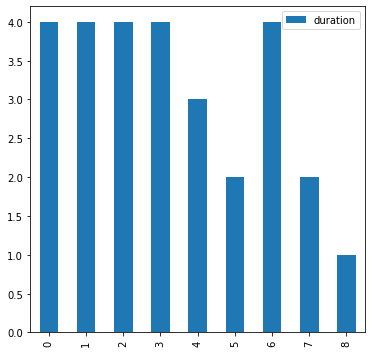

In [43]:
gantt_chart.plot.barh(y=['enter time', 'exit time'], figsize=(8,8))
gantt_chart.plot.bar(y="duration", figsize=(6,6))